In [1]:
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
import pandas as pd 
df=pd.read_csv('claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [4]:
df.drop(['CASENUM'],inplace=True,axis=1)


In [5]:
df.shape

(1340, 6)

In [6]:
df=df.dropna()

In [7]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [8]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
# linear regression and fit model
classifier=LinearRegression()
classifier.fit(X,Y)
classifier.score(X,Y)

0.06740699602264066

In [9]:
classifier=LogisticRegression()
classifier.fit(X,Y)
classifier.score(X,Y)

0.708029197080292

In [10]:
# prediction for x dataset
y_pred=classifier.predict(X)
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':y_pred})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [11]:
from sklearn.metrics import confusion_matrix
confusion_metrics=confusion_matrix(Y,y_pred)
print(confusion_metrics)

[[381 197]
 [123 395]]


In [12]:
# precision - waht percentage of your predictions were correct
# recall - what percentage of positive cASE did you catch
# f1 score - what percentage of positive prediction were correct
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [13]:
y_predict_prob=classifier.predict_proba(X)[:,0]
y_predict_prob

array([0.99999695, 0.49283215, 0.42483553, ..., 0.26097058, 0.71404606,
       0.31956906])

## roc curve

In [30]:
y_predict_prob=classifier.predict_proba(X)[:,1]
y_predict_prob


array([3.04592568e-06, 5.07167852e-01, 5.75164468e-01, ...,
       7.39029416e-01, 2.85953937e-01, 6.80430941e-01])

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,y_predict_prob)
auc=roc_auc_score(Y,y_pred)
auc

0.7108589063606365

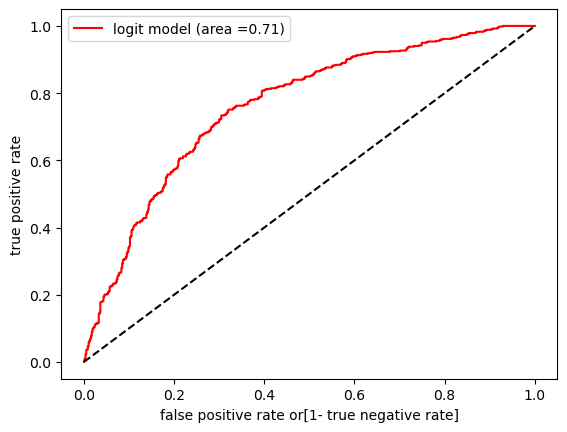

In [36]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model (area =%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or[1- true negative rate]')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [40]:
import pickle
filename='finalized_model.sav'
pickle.dump(classifier,open(filename,'wb'))


In [42]:
model=pickle.load(open(filename,'rb'))

In [46]:
x=[[1,1,1,50,5000],[0,0,1,45,0]]
y=model.predict(x)
prob=model.predict_proba(x)
print(y)
print(prob)

[0 0]
[[1.         0.        ]
 [0.61632389 0.38367611]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# multiple logistic regression

In [49]:
abalon_df=pd.read_csv('abalone.csv')
abalon_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
abalone_sex=abalon_df['Sex'].value_counts()
abalone_sex

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [57]:
abalon_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [63]:
X=abalon_df.drop(['Sex'],axis=1)
y=abalon_df['Sex']
print(X.columns)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [67]:
model1=LogisticRegression(random_state=0,multi_class='multinomial').fit(X_train,y_train)
preds=model1.predict(X_test)
params=model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# print model parameters
print('Intercept:\n',model1.intercept_)
print('coifficients:\n',model1.coef_)

Intercept:
 [-2.18379431  1.94113751  0.2426568 ]
coifficients:
 [[ 0.14238953  0.87214586  0.88483353  1.16629713 -1.00739553  1.95622241
   0.26086858  0.07135125]
 [ 2.26279432  0.90815243 -0.56674286 -2.71708728  0.21066462 -1.94453963
  -0.3191276  -0.13151323]
 [-2.40518385 -1.78029829 -0.31809067  1.55079015  0.79673091 -0.01168278
   0.05825902  0.06016198]]


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
preds=model1.predict(X_test)
confusion_metrics=confusion_matrix(y_test,preds)
print(confusion_metrics)

[[ 81  46 143]
 [ 13 207  40]
 [ 68  66 172]]


In [77]:
pd.DataFrame(confusion_metrics,index=['A_female','A_infant','A_Male'],
             columns=['predicted_female','predicted_infant','predicted_male'])


,predicted_female,predicted_infant,predicted_male
A_female,81,46,143
A_infant,13,207,40
A_Male,68,66,172


In [79]:
# accuracy statistics
print('Accuracy score:', accuracy_score(y_test,preds))

# create classiification report 
class_report=classification_report(y_test,preds)
print(class_report)

# the accuracy of the report is poor only 55% of prediction being corrrect


Accuracy score: 0.5502392344497608
              precision    recall  f1-score   support

           F       0.50      0.30      0.38       270
           I       0.65      0.80      0.72       260
           M       0.48      0.56      0.52       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.53       836

